In [42]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, calinski_harabasz_score,
                             silhouette_score)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/virgiliaantonucci/Documents/Flatiron/phase_4/phase-4-project/Spotify-2000.csv')

# Display the first few rows of the DataFrame to check its contents
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
# Get the unique values of the 'Top Genre' column
unique_genres = df['Top Genre'].unique()

# Display the unique genres
print(unique_genres)

['adult standards' 'album rock' 'alternative hip hop' 'alternative metal'
 'classic rock' 'alternative pop rock' 'pop' 'modern rock'
 'detroit hip hop' 'alternative rock' 'dutch indie' 'garage rock'
 'dutch cabaret' 'permanent wave' 'classic uk pop' 'dance pop'
 'modern folk rock' 'dutch pop' 'dutch americana' 'alternative dance'
 'german pop' 'afropop' 'british soul' 'irish rock' 'disco' 'big room'
 'art rock' 'danish pop rock' 'neo mellow' 'britpop' 'boy band'
 'carnaval limburg' 'arkansas country' 'latin alternative' 'british folk'
 'celtic' 'chanson' 'celtic rock' 'hip pop' 'east coast hip hop'
 'dutch rock' 'blues rock' 'electro' 'australian pop' 'belgian rock'
 'downtempo' 'reggae fusion' 'british invasion' 'finnish metal'
 'canadian pop' 'bow pop' 'dutch hip hop' 'dutch metal' 'soft rock'
 'acoustic pop' 'acid jazz' 'dutch prog' 'candy pop' 'operatic pop'
 'trance' 'scottish singer-songwriter' 'mellow gold' 'alternative pop'
 'dance rock' 'atl hip hop' 'eurodance' 'blues' 'canad

In [4]:
# Get the counts of each genre
genre_counts = df['Top Genre'].value_counts()

# Display the top 10 most popular genres
top_10_genres = genre_counts.head(10)
print(top_10_genres)

Top Genre
album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
Name: count, dtype: int64


### Broad Genre
Here I am creating a column in the dataframe called "Broad Column." It is looking through the "Top Genre" column and sortng each row into the more general genre of each song.

In [5]:
def map_to_broad_genre(top_genre):
    broad_genre_mapping = {
        'Metal': ['metal'],
        'Pop': ['pop'],
        'Rock': ['rock'],
        'Indie': ['indie'],
        'Standard': ['standards']
    }

    for broad_genre, keywords in broad_genre_mapping.items():
        for keyword in keywords:
            if keyword in top_genre.lower():
                return broad_genre

    return None

# Assuming df is your DataFrame and 'Top Genre' is the column you want to map
df['Broad Genre'] = df['Top Genre'].apply(map_to_broad_genre)

In [6]:
df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Broad Genre
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Standard
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Rock
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,None
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Metal
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63,Standard
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69,Standard
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74,Rock
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65,None


To make sure the dataset is mostly balanced, I am creating a new dataframe called balanced_df where there are about 100 songs from the top broad genres with the most song entries.

In [7]:
# Initialize an empty DataFrame to store the balanced data
balanced_df = pd.DataFrame(columns=df.columns)

# Define the number of rows to subsample for each broad genre
sample_size = 100

# Iterate through each broad genre
for broad_genre in df['Broad Genre'].unique():
    # Get all rows with the current broad genre
    genre_rows = df[df['Broad Genre'] == broad_genre]
    
    # Shuffle the rows randomly
    genre_rows = genre_rows.sample(frac=1, random_state=42)
    
    # Take a subset of the rows to achieve the desired sample size
    sampled_rows = genre_rows.head(sample_size)
    
    # Concatenate the sampled rows to the balanced_df
    balanced_df = pd.concat([balanced_df, sampled_rows])

# Reset the index of the balanced DataFrame
balanced_df.reset_index(drop=True, inplace=True)

In [8]:
balanced_df

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Broad Genre
0,628,"Theme From New York, New York",Frank Sinatra,adult standards,2015,109,59,41,-5,28,56,204,55,3,68,Standard
1,981,Sailing,Rod Stewart,adult standards,1975,129,37,43,-10,32,19,278,37,3,68,Standard
2,991,Nights On Broadway,Bee Gees,adult standards,1975,89,64,57,-9,86,61,271,24,4,53,Standard
3,1844,A Change Is Gonna Come,Sam Cooke,adult standards,1964,174,38,21,-10,30,45,191,72,3,66,Standard
4,125,Papa Was A Rolling Stone,The Temptations,adult standards,2001,120,60,85,-12,19,87,433,6,4,44,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,408,Don't Give up the Fight,Racoon,dutch indie,2010,91,30,28,-13,12,26,210,88,3,27,Indie
468,1317,Groot Hart,De Dijk,dutch indie,1985,129,46,78,-14,22,66,195,46,4,26,Indie
469,1725,Op Fietse,Skik,dutch indie,1997,104,86,53,-5,24,86,291,19,3,46,Indie
470,237,Lost,Anouk,dutch indie,2004,90,25,52,-10,14,14,222,22,3,51,Indie


In [9]:
# Count the occurrences of each unique value in 'Broad Genre'
genre_counts = balanced_df['Broad Genre'].value_counts()

# Check if the counts are balanced
is_balanced = all(genre_counts == genre_counts.iloc[0])

# Print the counts and whether they are balanced
print("Genre Counts:")
print(genre_counts)
print("Is Balanced:", is_balanced)

Genre Counts:
Broad Genre
Standard    100
Rock        100
Pop         100
Metal        93
Indie        79
Name: count, dtype: int64
Is Balanced: False


The dataset is not perfectly balanced, but it is close enough for the purpose of this code.

Here I am created a playlist of 10 random Indie songs to use as the basis of my recommendations.

In [10]:
# Filter rows where 'Broad Genre' is 'Indie'
indie_songs = df[df['Broad Genre'] == 'Indie']

# Randomly select 10 songs from the filtered DataFrame
playlist = indie_songs.sample(n=10, random_state=42)

# Reset the index of the playlist DataFrame
playlist.reset_index(drop=True, inplace=True)

In [11]:
playlist

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Broad Genre
0,531,Dansen Op De Vulkaan,De Dijk,dutch indie,2013,151,95,58,-4,4,78,269,2,6,40,Indie
1,13,Als Het Golft,De Dijk,dutch indie,2000,102,88,54,-6,53,59,214,2,3,34,Indie
2,411,No Mercy,Racoon,dutch indie,2010,104,57,77,-6,11,61,165,9,3,36,Indie
3,532,Witch Doctor,De Staat,dutch indie,2013,145,56,60,-7,5,33,207,0,6,47,Indie
4,381,Never Be Clever,Herman Brood & His Wild Romance,dutch indie,2001,138,89,56,-5,32,96,183,54,4,41,Indie
5,513,Follow the Sun,Xavier Rudd,australian indie folk,2012,124,39,61,-11,11,22,255,53,4,67,Indie
6,172,Sweet Goodbyes,Krezip,dutch indie,2009,110,33,63,-9,11,47,193,74,3,56,Indie
7,1695,Avond,Boudewijn de Groot,dutch indie,1996,98,37,48,-15,12,17,277,66,4,40,Indie
8,91,De Vondeling Van Ameland,Boudewijn de Groot,dutch indie,2007,110,35,39,-10,11,16,306,67,3,19,Indie
9,197,Hier Kom Ik Weg,Daniël Lohues,dutch indie,2008,92,38,57,-10,13,53,208,85,3,39,Indie


# Recommendations
We are implementing K-Means with 5 clusters to group the songs by similarities in their feature space.

In [12]:
# Columns to use for clustering
cluster_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
                   'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
                   'Speechiness', 'Popularity']

# Number of clusters
n_clusters = 5

# Clean and convert numeric columns
for col in cluster_columns:
    # Try to convert values to numeric, replace non-convertible values with NaN
    balanced_df[col] = pd.to_numeric(balanced_df[col], errors='coerce')

# Remove rows with NaN values in any of the selected columns
cluster_df = balanced_df.dropna(subset=cluster_columns)

# Subset the DataFrame for clustering
cluster_df = cluster_df[cluster_columns]

Confirming that k=5 is a good number for k using elbow plots:

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/pyth

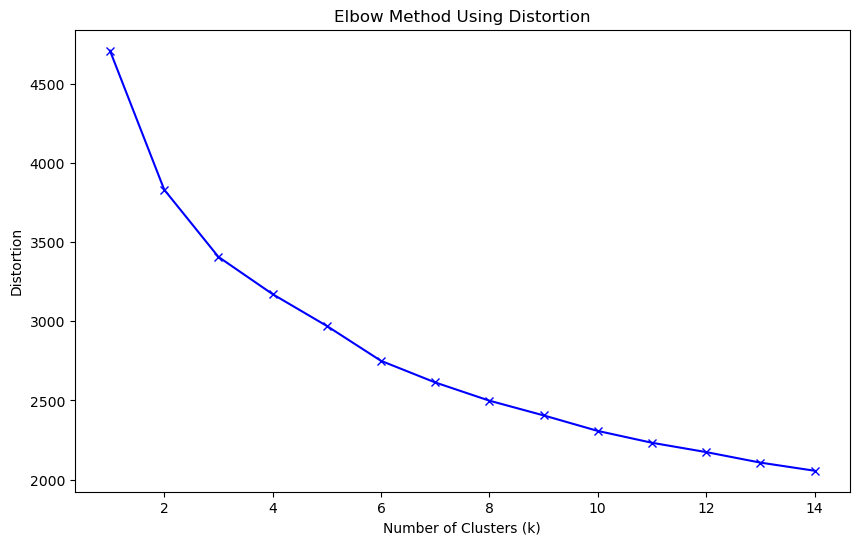

In [13]:
# Columns to use for clustering
cluster_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
                   'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
                   'Speechiness', 'Popularity']

# Clean and convert numeric columns
for col in cluster_columns:
    # Try to convert values to numeric, replace non-convertible values with NaN
    balanced_df[col] = pd.to_numeric(balanced_df[col], errors='coerce')

# Remove rows with NaN values in any of the selected columns
cluster_df = balanced_df.dropna(subset=cluster_columns)

# Subset the DataFrame for clustering
cluster_df = cluster_df[cluster_columns]
# It's a good idea to scale the data before clustering
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df)

# Determine the distortions for a range of cluster numbers
distortions = []
K = range(1, 15)  # considering clusters from 1 to 14
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_df_scaled)
    distortions.append(km.inertia_)

# Plot the elbow curve using distortion
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method Using Distortion')
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/pyth

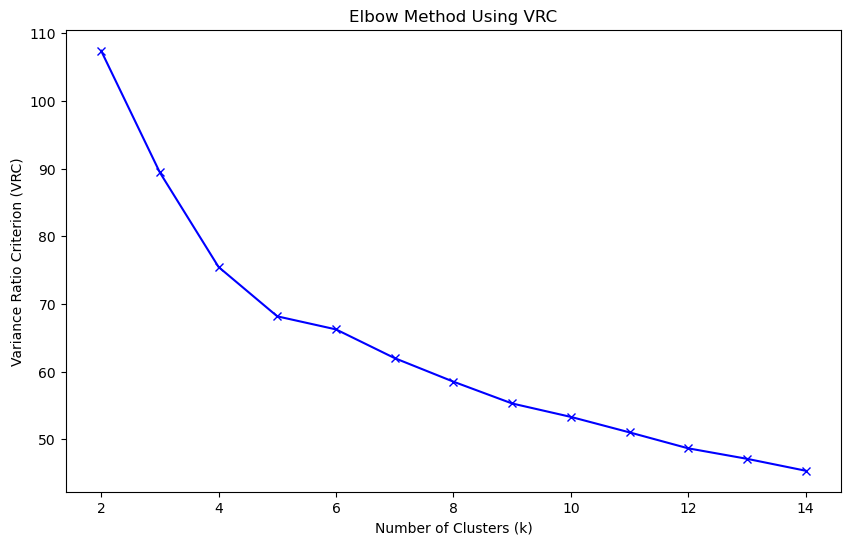

In [14]:
# Determine the variance ratio for a range of cluster numbers
vrc_scores = []
K = range(2, 15)  # considering clusters from 2 to 14 (VRC is undefined for K=1)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    cluster_labels = km.fit_predict(cluster_df_scaled)
    vrc_score = calinski_harabasz_score(cluster_df_scaled, cluster_labels)
    vrc_scores.append(vrc_score)

# Plot the curve using variance ratio criterion
plt.figure(figsize=(10, 6))
plt.plot(K, vrc_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance Ratio Criterion (VRC)')
plt.title('Elbow Method Using VRC')
plt.show()

In [15]:
# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df)

# Initialize a dictionary to keep track of recommended songs by cluster
recommended_songs_by_cluster = {cluster_label: set() for cluster_label in range(n_clusters)}

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
# Define a function to find a song in the same cluster with a different broad genre
def find_song_with_different_genre(song):
    cluster_label = cluster_df.loc[song.name, 'Cluster']
    cluster_songs = cluster_df[cluster_df['Cluster'] == cluster_label]
    
    # Merge cluster_df with balanced_df to access 'Broad Genre' and 'Title'
    cluster_songs = cluster_songs.merge(balanced_df[['Broad Genre', 'Title']], left_index=True, right_index=True)
    
    # Filter songs with a different broad genre and not already recommended
    filtered_songs = cluster_songs[
        (cluster_songs['Broad Genre'] != song['Broad Genre']) &
        (~cluster_songs['Title'].isin(recommended_songs_by_cluster[cluster_label]))
    ]
    
    # Randomly select one song from the filtered songs
    if not filtered_songs.empty:
        recommended_song = filtered_songs.sample(n=1, random_state=42)['Title'].values[0]
        # Add the recommended song to the set of recommended songs for the cluster
        recommended_songs_by_cluster[cluster_label].add(recommended_song)
        return recommended_song
    else:
        return None

In [17]:
# Define a function to find a song in the same cluster with a different broad genre
def find_song_with_different_genre(song):
    cluster_label = cluster_df.loc[song.name, 'Cluster']
    cluster_songs = cluster_df[cluster_df['Cluster'] == cluster_label]
    
    # Merge cluster_df with balanced_df to access 'Broad Genre' and 'Title'
    cluster_songs = cluster_songs.merge(balanced_df[['Title']], left_index=True, right_index=True)

    print(cluster_songs)
    
    # Filter songs with a different broad genre and not already recommended
    filtered_songs = cluster_songs[
        (cluster_songs['Broad Genre'] != song['Broad Genre']) &
        (~cluster_songs['Title'].isin(recommended_songs_by_cluster[cluster_label]))
    ]
    
    if not filtered_songs.empty:
        # Calculate cosine similarity
        features = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
                    'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
                    'Speechiness', 'Popularity']
        song_vector = song[features].values.reshape(1, -1)
        cluster_vectors = filtered_songs[features].values
        similarities = cosine_similarity(song_vector, cluster_vectors)
        
        # Get the index of the most similar song
        most_similar_idx = similarities.argmax()
        
        # Get the title of the most similar song
        recommended_song = filtered_songs.iloc[most_similar_idx]['Title']
        
        # Add the recommended song to the set of recommended songs for the cluster
        recommended_songs_by_cluster[cluster_label].add(recommended_song)
        return recommended_song
    else:
        return None


In [18]:
# Define a list to store the original song, recommended song, and cosine similarity
recommendations_list = []

# Define a function to find a song in the same cluster with a different broad genre
def find_song_with_different_genre(song):
    cluster_label = cluster_df.loc[song.name, 'Cluster']
    cluster_songs = cluster_df[cluster_df['Cluster'] == cluster_label]
    
    # Merge cluster_df with balanced_df to access 'Broad Genre' and 'Title'
    cluster_songs = cluster_songs.merge(balanced_df[['Broad Genre', 'Title']], left_index=True, right_index=True)
    
    # Filter songs with a different broad genre and not already recommended
    filtered_songs = cluster_songs[
        (cluster_songs['Broad Genre'] != song['Broad Genre']) &
        (~cluster_songs['Title'].isin(recommended_songs_by_cluster[cluster_label]))
    ]
    
    if not filtered_songs.empty:
        # Calculate cosine similarity
        features = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
                    'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
                    'Speechiness', 'Popularity']
        song_vector = song[features].values.reshape(1, -1)
        cluster_vectors = filtered_songs[features].values
        similarities = cosine_similarity(song_vector, cluster_vectors)
        
        # Get the index of the most similar song
        most_similar_idx = similarities.argmax()
        
        # Get the title of the most similar song
        recommended_song_title = filtered_songs.iloc[most_similar_idx]['Title']
        
        # Add the original song, recommended song, and their cosine similarity to the list
        recommendations_list.append({
            'Original Song': song['Title'],
            'Recommended Song': recommended_song_title,
            'Cosine Similarity': similarities[0][most_similar_idx]
        })
        
        # Add the recommended song to the set of recommended songs for the cluster
        recommended_songs_by_cluster[cluster_label].add(recommended_song_title)
        
        return song['Title'], recommended_song_title, similarities[0][most_similar_idx]
    else:
        return None

# After processing all songs:
recommendations_df = pd.DataFrame(recommendations_list)

In [19]:
# For each song in the playlist, find another song in the same cluster with a different genre
playlist[['Original Song', 'Recommended Song', 'Cosine Similarity']] = playlist.apply(find_song_with_different_genre, axis=1, result_type='expand')

# Reset the index for the playlist DataFrame
playlist.reset_index(drop=True, inplace=True)

In [20]:
playlist[['Original Song', 'Recommended Song', 'Cosine Similarity']]

,Original Song,Recommended Song,Cosine Similarity
0,Dansen Op De Vulkaan,San Francisco (Be Sure to Wear Some Flowers In...,0.988797
1,Als Het Golft,We Didn't Start the Fire,0.990075
2,No Mercy,Major Tom,0.983494
3,Witch Doctor,I Started A Joke,0.986597
4,Never Be Clever,Isn't She Lovely,0.908353
5,Follow the Sun,Behind Blue Eyes,0.997868
6,Sweet Goodbyes,Long As I Can See The Light,0.985657
7,Avond,"Theme From New York, New York",0.959533
8,De Vondeling Van Ameland,You Got It,0.939453
9,Hier Kom Ik Weg,Hilversum 3,0.995594


In [21]:
# Columns to use for clustering
cluster_columns = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
                   'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
                   'Speechiness', 'Popularity']

# Number of clusters
n_clusters = 5

# Clean and convert numeric columns
for col in cluster_columns:
    # Try to convert values to numeric, replace non-convertible values with NaN
    balanced_df[col] = pd.to_numeric(balanced_df[col], errors='coerce')

# Remove rows with NaN values in any of the selected columns
cluster_df = balanced_df.dropna(subset=cluster_columns)

# Subset the DataFrame for clustering
cluster_df = cluster_df[cluster_columns]

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df)

# Add the 'Broad Genre' column to the cluster_df for color-coding
cluster_df['Broad Genre'] = balanced_df['Broad Genre']

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(cluster_df[cluster_columns])

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


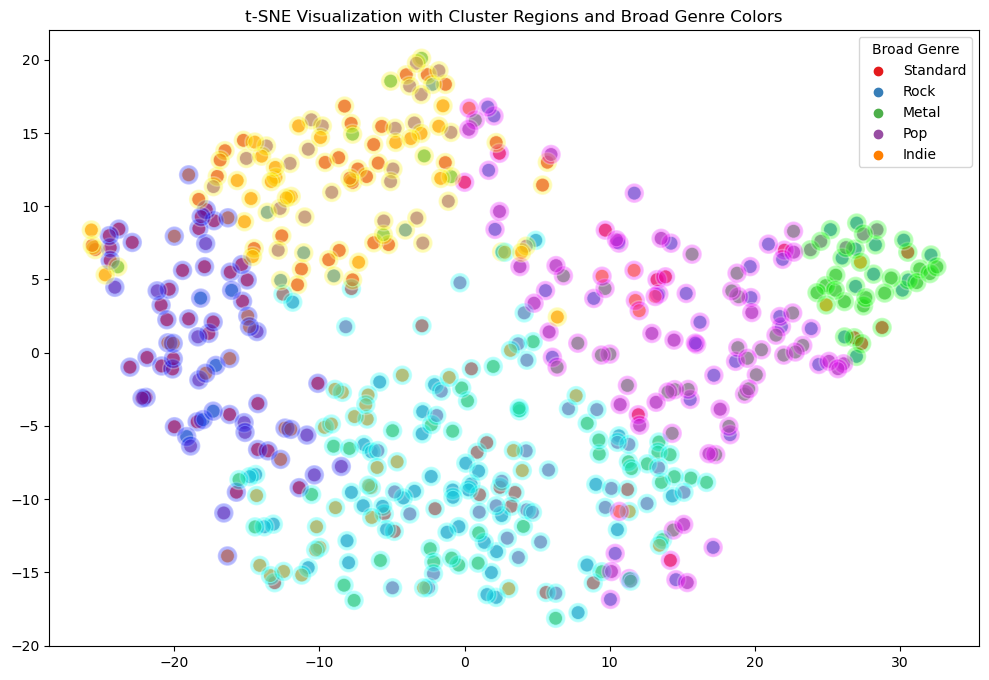

In [22]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))

# Color code the data points based on their broad genre
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=cluster_df['Broad Genre'],
    palette='Set1',  # You can choose a different color palette
    legend='full',
    alpha=0.7,
    s=100  # Adjust the size of the points
)

# Draw regions to show the clusters
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=cluster_df['Cluster'],
    palette=sns.color_palette("hsv", n_clusters),
    legend=False,  # Disable the cluster legend
    alpha=0.3,
    s=200,  # Adjust the size of the points for clusters
    marker='o'  # Use a different marker for clusters
)

plt.title("t-SNE Visualization with Cluster Regions and Broad Genre Colors")
plt.show()

This isn't bad, but let's make the image clearer. We want to easily be able to differentiate between the genres.

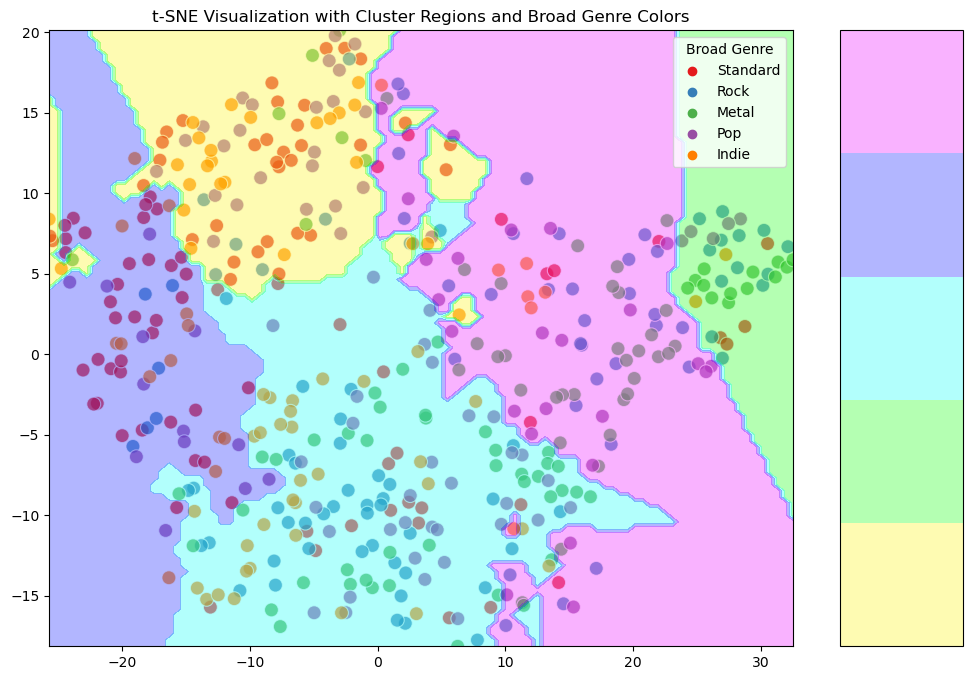

In [23]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))

# Color code the data points based on their broad genre
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=cluster_df['Broad Genre'],
    palette='Set1',
    legend='full',
    alpha=0.7,
    s=100
)

# Prepare data for boundary contours
x = tsne_result[:, 0]
y = tsne_result[:, 1]
z = cluster_df['Cluster']

# Create a grid
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate unstructured D-dimensional data
from scipy.interpolate import griddata
zi = griddata((x, y), z, (xi, yi), method='nearest')

# Convert Seaborn color palette to Matplotlib colormap
my_cmap = ListedColormap(sns.color_palette("hsv", n_clusters))

# Use the new colormap in contourf
contour = plt.contourf(xi, yi, zi, levels=np.arange(n_clusters+1)-0.5, alpha=0.3, cmap=my_cmap)

# Disable colorbar for contours
cbar = plt.colorbar(contour, aspect=5)
cbar.set_ticks([])

plt.title("t-SNE Visualization with Cluster Regions and Broad Genre Colors")
plt.show()


Now let's make the dots easier to see.

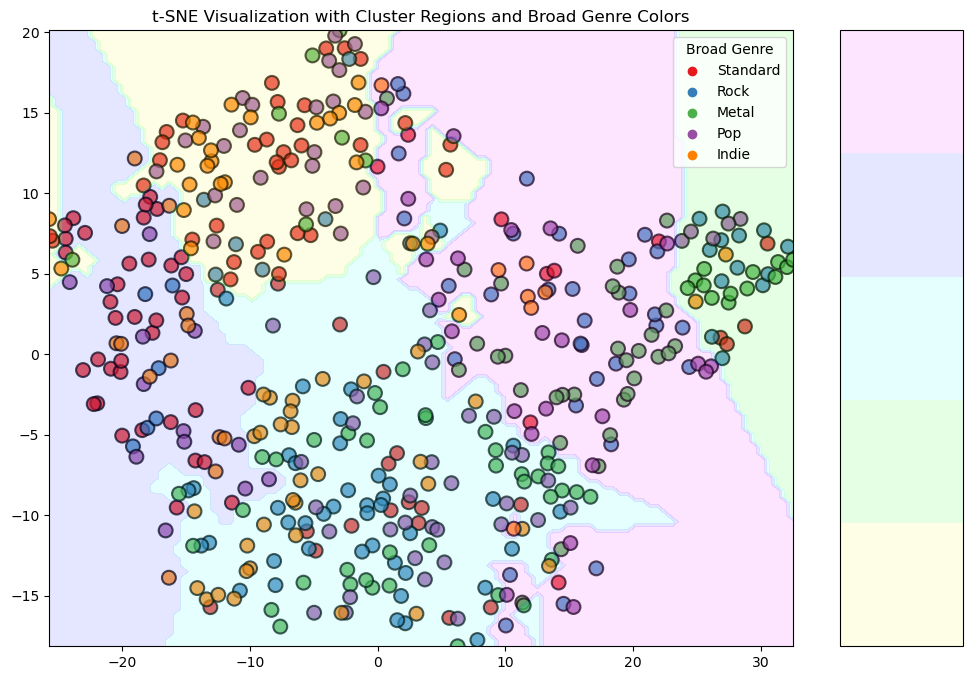

In [24]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(12, 8))

# Color code the data points based on their broad genre
sns.scatterplot(
    x=tsne_result[:, 0],
    y=tsne_result[:, 1],
    hue=cluster_df['Broad Genre'],
    palette='Set1',
    legend='full',
    alpha=0.7,
    s=100,
    edgecolor="black",   # <-- Add this line for bolder edges
    linewidth=1.5        # <-- Adjust this value for desired boldness
)

# Prepare data for boundary contours
x = tsne_result[:, 0]
y = tsne_result[:, 1]
z = cluster_df['Cluster']

# Create a grid
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate unstructured D-dimensional data
from scipy.interpolate import griddata
zi = griddata((x, y), z, (xi, yi), method='nearest')

# Convert Seaborn color palette to Matplotlib colormap
my_cmap = ListedColormap(sns.color_palette("hsv", n_clusters))

# Use the new colormap in contourf with decreased alpha for more transparency
contour = plt.contourf(xi, yi, zi, levels=np.arange(n_clusters+1)-0.5, alpha=0.1, cmap=my_cmap)  # <-- Adjust alpha here

# Disable colorbar for contours
cbar = plt.colorbar(contour, aspect=5)
cbar.set_ticks([])

plt.title("t-SNE Visualization with Cluster Regions and Broad Genre Colors")
plt.show()


# Classifying

### Decision Tree, ft. SMOTE

In [25]:
# Select the feature columns
features = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
            'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
            'Speechiness', 'Popularity']

X = balanced_df[features]
y = balanced_df['Broad Genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use the same imputer to transform the test data

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_imputed, y_train)

# Now, X_train_smote and y_train_smote are oversampled and can be used to train the model.

In [26]:
# Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Calculate accuracy on training data
y_train_pred = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Decision Tree Accuracy on Training Data: {accuracy_train:.4f}")

# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy on test data
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy on Test Data: {accuracy_test:.4f}")

# Use cross-validation to get a better estimate of performance
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Average CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")


Decision Tree Accuracy on Training Data: 1.0000
Decision Tree Accuracy on Test Data: 0.3895
Average CV Accuracy: 0.4326 +/- 0.0595


/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


The accuracy is still higher than if we were randomly guessing which genre, which would be 0.2.

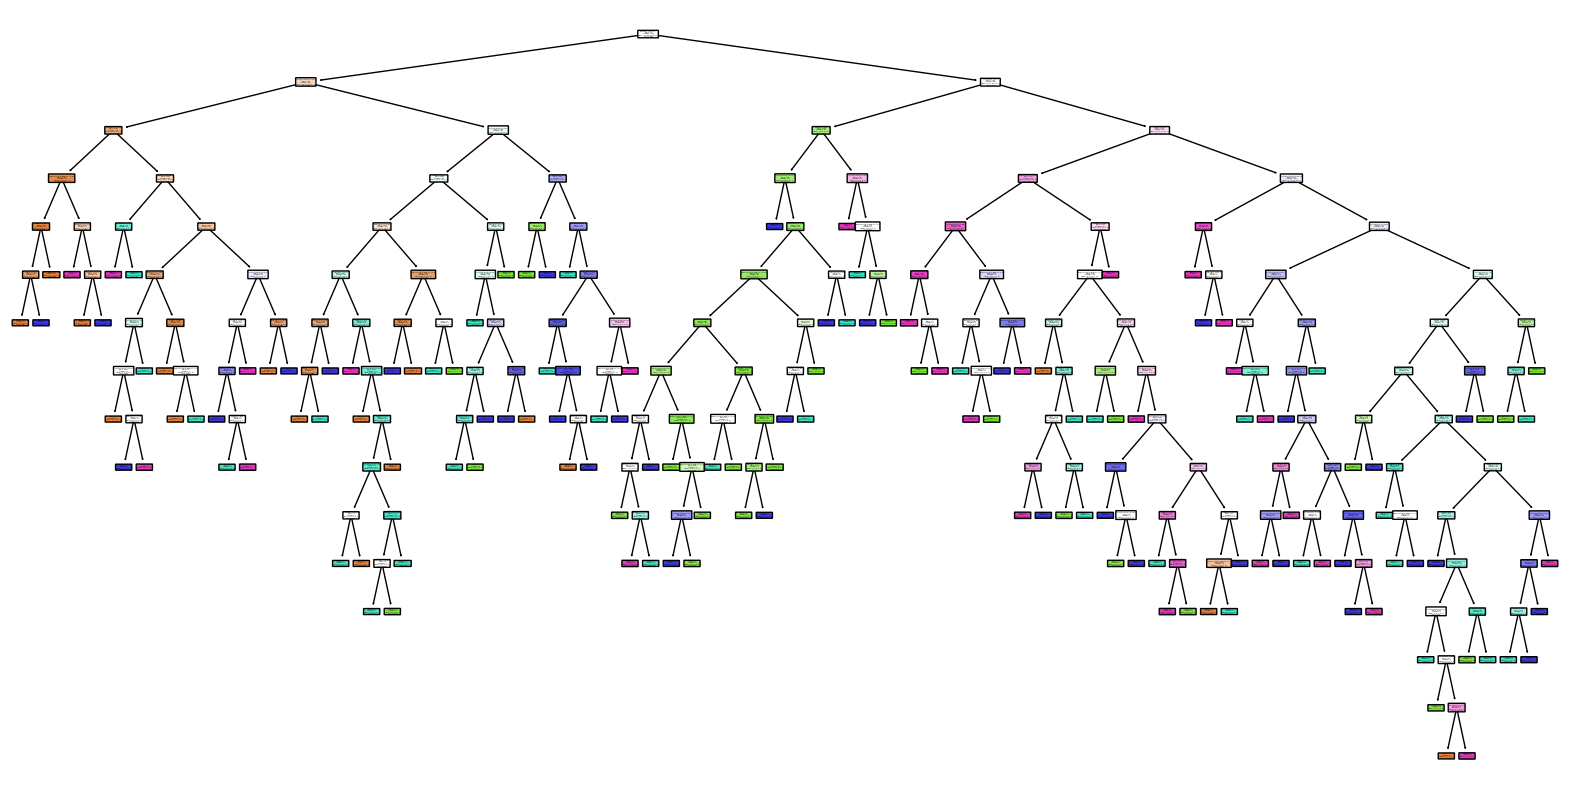

In [28]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

Let's put a limit on the max depth and hyperparameter tune for a better accuracy.

In [29]:
param_grid = {
    'max_depth': [None] + list(range(1, 20))  # Here we are considering tree depths from 1 to 20 and also the default None
}

In [30]:
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19]},
             return_train_score=True, scoring='accuracy')

In [32]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best max_depth: {best_params['max_depth']}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best max_depth: 9
Best cross-validation accuracy: 0.4698


In [33]:
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy with best max_depth: {test_accuracy:.4f}")

Test set accuracy with best max_depth: 0.4316


/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


The accuracy is higher.

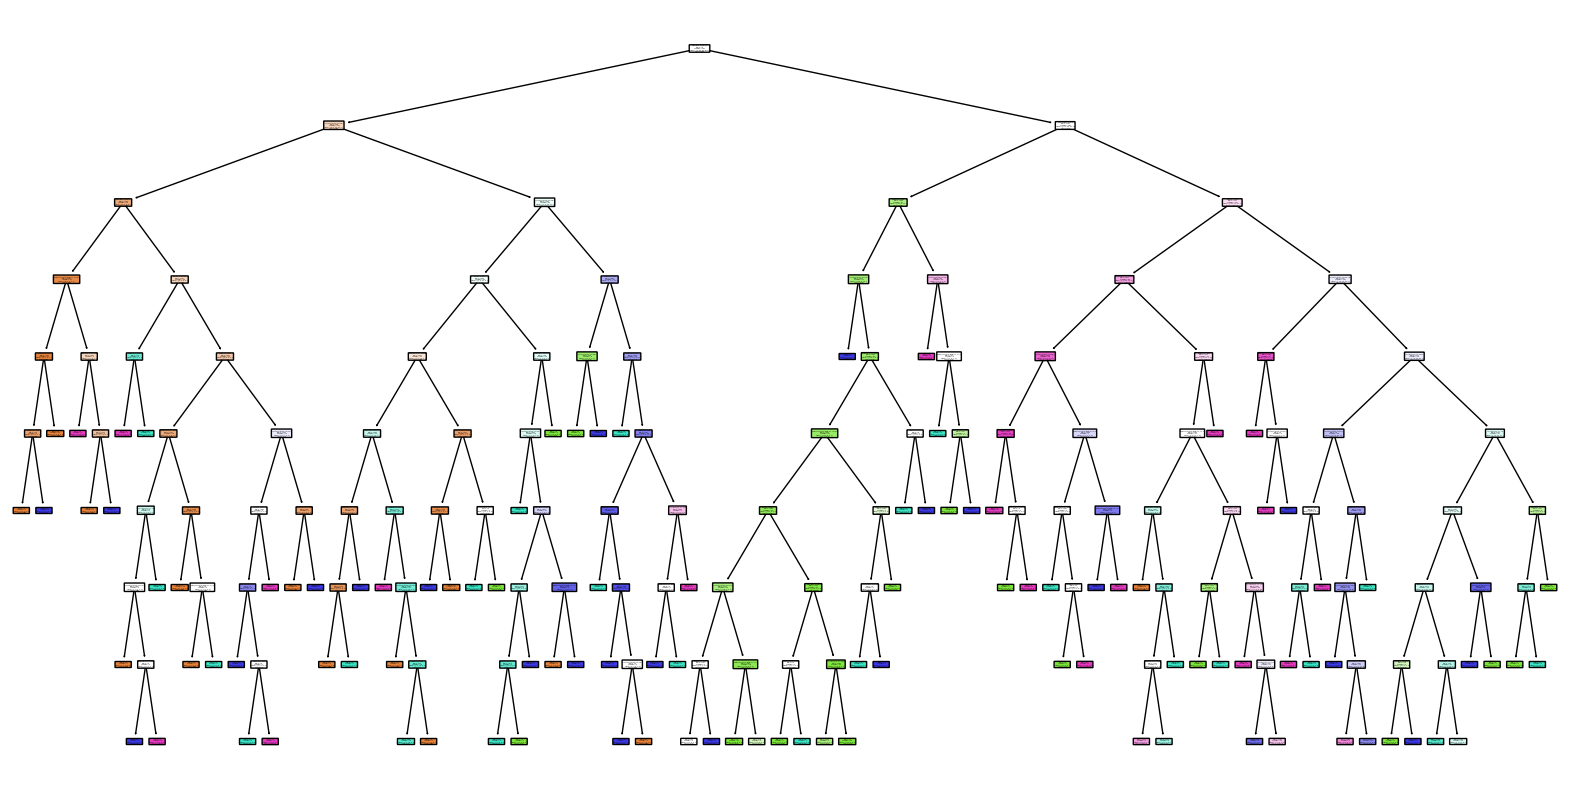

In [34]:
best_clf = grid_search.best_estimator_  # This gets the best tree model from the grid search

plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=features, class_names=best_clf.classes_, filled=True, rounded=True)
plt.show()

For the sake of being able to read the numbers, let's look at the beginning of the tree.

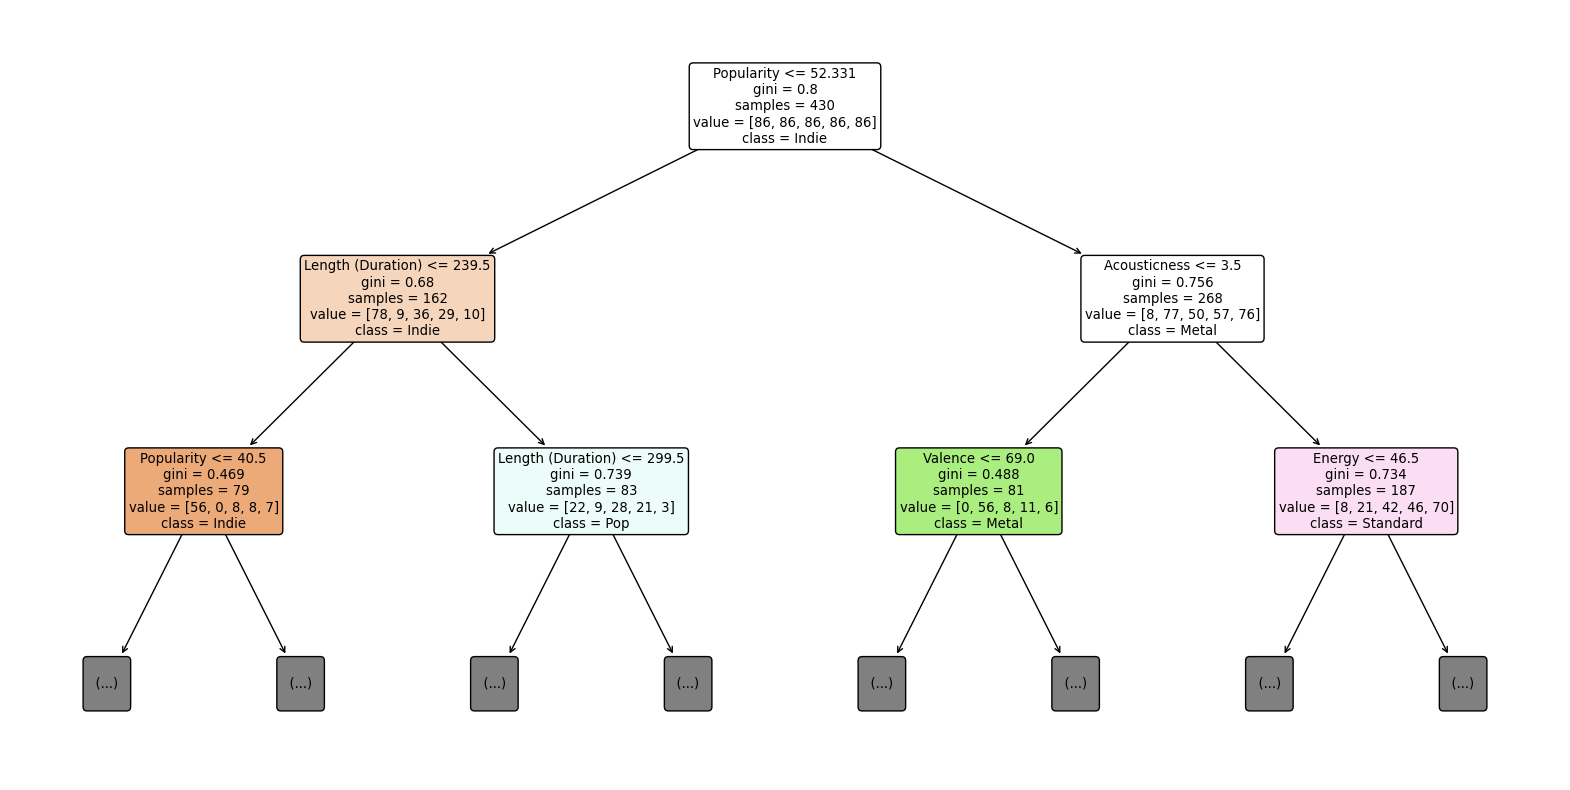

In [35]:
best_clf = grid_search.best_estimator_  # This gets the best tree model from the grid search

plt.figure(figsize=(20,10))
plot_tree(best_clf, feature_names=features, class_names=best_clf.classes_, filled=True, rounded=True, max_depth=2)
plt.show()

### XGBoost

In [36]:
# Encode the string labels to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Use the same encoder to transform the test labels

# Initialize the classifier
xgb_clf = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

# Train the classifier with the encoded labels
xgb_clf.fit(X_train, y_train_encoded)

# Predict the labels for the test set
y_pred_xgb_encoded = xgb_clf.predict(X_test)

# Decode the predicted labels back to the original string labels
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

# Calculate the accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.4632


In [37]:
# Encode the string labels to numerical labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # Use the same encoder to transform the test labels

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# Initialize the classifier
xgb_clf = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Print best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to predict on the test set
best_xgb_clf = grid_search.best_estimator_

y_pred_xgb_encoded = best_xgb_clf.predict(X_test)

# Decode the predicted labels back to the original string labels
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

# Calculate the accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy with Best Parameters: {accuracy_xgb:.4f}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
XGBoost Accuracy with Best Parameters: 0.5053


### Random Forest

In [38]:
# Impute missing values in the training and testing data
imputer = SimpleImputer(strategy='mean')  # Here, we are filling NaN values with the mean of the column. You can change the strategy to 'median' or 'most_frequent' as per your needs.

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train_imputed, y_train)

# Predict the labels for the test set
y_pred_rf = rf_clf.predict(X_test_imputed)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.5684


/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [39]:
# Impute missing values in the training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_clf.fit(X_train_imputed, y_train)

# Calculate accuracy on training data
y_train_pred_rf = rf_clf.predict(X_train_imputed)
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Random Forest Accuracy on Training Data: {accuracy_train_rf:.4f}")

# Predict the labels for the test set
y_pred_rf = rf_clf.predict(X_test_imputed)

# Calculate the accuracy on test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on Test Data: {accuracy_rf:.4f}")

# Use cross-validation to get a better estimate of performance
cv_scores = cross_val_score(rf_clf, X_train_imputed, y_train, cv=5, scoring='accuracy')
print(f"Average CV Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")

/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Random Forest Accuracy on Training Data: 1.0000
Random Forest Accuracy on Test Data: 0.5684
Average CV Accuracy: 0.5837 +/- 0.0868


Clearly we "overfit" the data, however, we still achieved the best out of sample performance using this model. Therefore, despite the evidence of overfitting, we would still choose to use this model. It wasn't overfitting before SMOTE.

In [40]:
# Impute missing values in the training and testing data
imputer = SimpleImputer(strategy='mean')  # Filling NaN values with the mean of the column.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the classifier, parameter grid, and the number of cross-validations
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train_imputed, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train and predict using the best parameters
best_rf_clf = RandomForestClassifier(**best_params, random_state=42)
best_rf_clf.fit(X_train_imputed, y_train)
y_pred_rf = best_rf_clf.predict(X_test_imputed)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy (with hyperparameter tuning): {accuracy_rf:.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/opt/homebrew/Caskroom/miniforge/base/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samp